In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"


In [7]:
def chop_segments_3(df):
    df_chop_all = pd.DataFrame()
    for i in range(len(df)):
        n_chop_segs = 3
        x_new = np.linspace(df.x1.values[i], df.x2.values[i], n_chop_segs + 1)
        y_new = np.linspace(df.y1.values[i], df.y2.values[i], n_chop_segs + 1)
        x1_new = x_new[0:-1]
        y1_new = y_new[0:-1]
        x2_new = x_new[1::]
        y2_new = y_new[1::]

        # Create dataframe from chopped coordinates
        df_chop = pd.DataFrame(
            {
                "x1": x1_new,
                "y1": y1_new,
                "x2": x2_new,
                "y2": y2_new,
            }
        )
        # Copy over properties from initial segment
        df_chop["collection"] = df.collection[i]
        df_chop["name"] = np.arange(n_chop_segs)
        df_chop["bc_type_x"] = df.bc_type_x[i]
        df_chop["bc_x"] = df.bc_x[i]
        df_chop["bc_type_y"] = df.bc_type_y[i]
        df_chop["bc_y"] = df.bc_y[i]
        df_chop_all = pd.concat([df_chop_all, df_chop], ignore_index=True)

    return df_chop_all


# Chop interseismic
input_file_interseismic = "mht_geometry_bcnew_5_km.csv"
output_file_interseismic = "mht_geometry_bcnew_5_km_split_in_3.csv"
df_interseismic = pd.read_csv(input_file_interseismic)
df_interseismic_chopped = chop_segments_3(df_interseismic)
# df_interseismic_chopped.to_csv(output_file_interseismic, index=False)
print(f"{len(df_interseismic)}")
print(f"{len(df_interseismic_chopped)}")

# Chop coseismic
input_file_coseismic = "mht_geometry_gorkha_5_km.csv"
output_file_coseismic = "mht_geometry_gorkha_5_km_split_in_3.csv"
df_coseismic = pd.read_csv(input_file_coseismic)
df_coseismic_chopped = chop_segments_3(df_coseismic)
# df_coseismic_chopped.to_csv(output_file_coseismic, index=False)
print(f"{len(df_coseismic)}")
print(f"{len(df_coseismic_chopped)}")

331
993
331
993


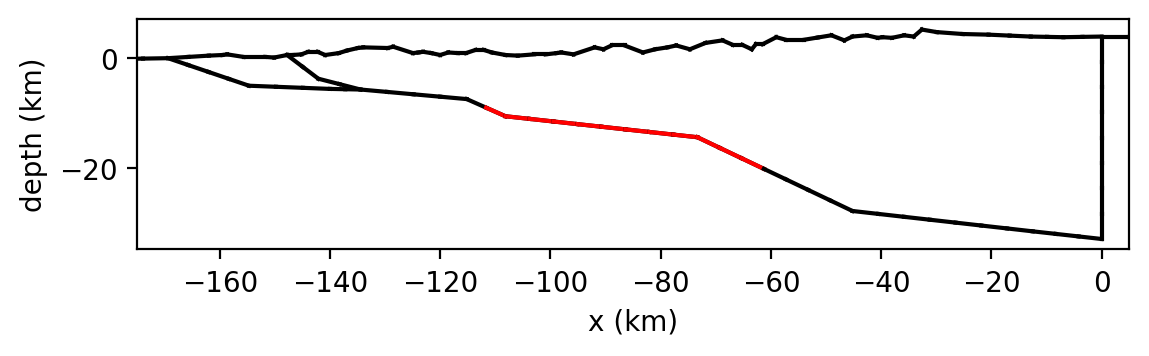

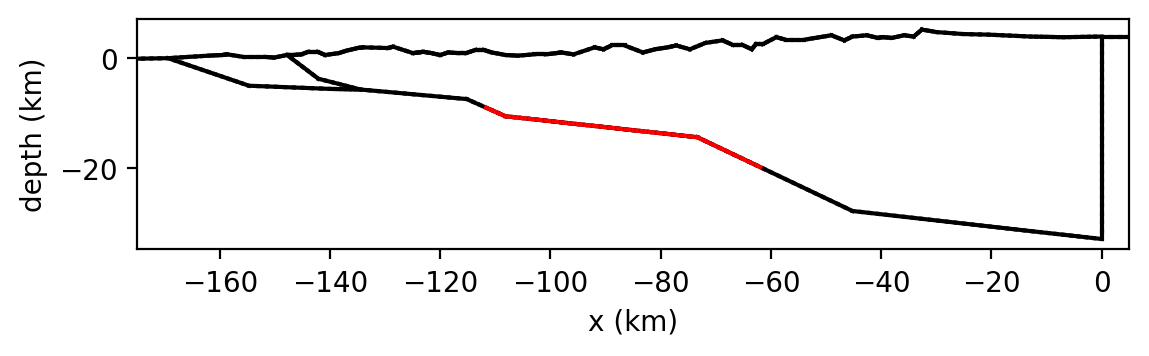

In [27]:
def plot_bcs(df):
    for i in range(len(df)):
        plt.plot(
            [df.x1[i], df.x2[i]],
            [df.y1[i], df.y2[i]],
            "-k",
        )
        if df.bc_x[i] != 0:
            plt.plot(
                [df.x1[i], df.x2[i]],
                [df.y1[i], df.y2[i]],
                "-r",
            )

    plt.xlim([-175, 5])
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("x (km)")
    plt.ylabel("depth (km)")
    plt.show()


plot_bcs(df_coseismic)
plot_bcs(df_coseismic_chopped)

In [32]:
# print(df_interseismic[df_interseismic.bc_x != 0])
# print(df_interseismic_chopped[df_interseismic_chopped.bc_x != 0])

print(df_coseismic[df_coseismic.bc_x != 0])
print(df_coseismic_chopped[df_coseismic_chopped.bc_x != 0])

          x1      y1       x2      y2 collection  name bc_type_x  bc_x  \
97  -111.666  -8.978 -108.148 -10.536   ramp_mft     1   s_local  -1.0   
98  -108.148 -10.536 -103.796 -11.011   ramp_mft     0   s_local  -3.0   
99  -103.796 -11.011  -99.444 -11.487   ramp_mft     1   s_local  -4.0   
100  -99.444 -11.487  -95.092 -11.963   ramp_mft     2   s_local  -4.0   
101  -95.092 -11.963  -90.740 -12.439   ramp_mft     3   s_local  -5.0   
102  -90.740 -12.439  -86.388 -12.915   ramp_mft     4   s_local  -6.0   
103  -86.388 -12.915  -82.036 -13.391   ramp_mft     5   s_local  -5.0   
104  -82.036 -13.391  -77.684 -13.867   ramp_mft     6   s_local  -4.0   
105  -77.684 -13.867  -73.333 -14.343   ramp_mft     7   s_local  -4.0   
106  -73.333 -14.343  -69.311 -16.255   ramp_mft     0   s_local  -3.0   
107  -69.311 -16.255  -65.290 -18.167   ramp_mft     1   s_local  -1.0   
108  -65.290 -18.167  -61.269 -20.079   ramp_mft     2   s_local  -0.5   

    bc_type_y  bc_y  
97    s_local  